<a href="https://colab.research.google.com/github/poltorashka-s-BMa/course-os-linux/blob/main/%D0%BF%D0%B0%D1%80%D1%81%D0%B8%D0%BD%D0%B3_%D1%81%D1%82%D0%B0%D1%82%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import random
import json
import time

ModuleNotFoundError: No module named 'selenium'

In [ ]:
chrome_options = Options()
chrome_options.add_argument("--disable-blink-features=AutomationControlled")
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64)")


driver = webdriver.Chrome(
    service=Service(ChromeDriverManager().install()),
    options=chrome_options
)

articles_data = []
max_articles = 500  # Лимит статей для сбора
base_url = "https://pubmed.ncbi.nlm.nih.gov"

def scrape_page():
    """Парсит текущую страницу результатов"""
    articles = driver.find_elements(By.CLASS_NAME, "docsum-content")
    for article in articles:
        try:
            title = article.find_element(By.CLASS_NAME, "docsum-title").text
            article_url = article.find_element(By.CLASS_NAME, "docsum-title").get_attribute("href")

            # Сохраняем базовые данные без перехода на страницу
            articles_data.append({
                "title": title,
                "url": article_url
            })

            # Если нужно полные абстракты - раскомментируйте:
            scrape_full_abstract(article_url)

        except Exception as e:
            print(f"Ошибка при парсинге карточки: {str(e)}")
            continue

def scrape_full_abstract(url):
    """Парсит полный абстракт со страницы статьи"""
    driver.execute_script(f"window.open('{url}');")
    driver.switch_to.window(driver.window_handles[1])

    try:
        WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, ".abstract-content, .empty-abstract"))
        )
        abstract = driver.find_element(By.CSS_SELECTOR, ".abstract-content").text \
                  if driver.find_elements(By.CSS_SELECTOR, ".abstract-content") \
                  else "No abstract available"

        articles_data[-1]["full_abstract"] = abstract  # Добавляем к последней статье
        time.sleep(random.uniform(2, 4))

    except Exception as e:
        print(f"Ошибка при парсинге абстракта: {str(e)}")
    finally:
        driver.close()
        driver.switch_to.window(driver.window_handles[0])

try:
    # Первоначальный поиск
    search_query = "rodent behavior machine learning"
    driver.get(f"{base_url}/?term={search_query}")

    # Главный цикл пагинации
    while len(articles_data) < max_articles:
        # Прокрутка и загрузка контента
        last_height = driver.execute_script("return document.body.scrollHeight")
        for _ in range(3):
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(random.uniform(3, 6))
            new_height = driver.execute_script("return document.body.scrollHeight")
            if new_height == last_height:
                break
            last_height = new_height

        # Парсинг текущей страницы
        scrape_page()
        print(f"Собрано статей: {len(articles_data)}/{max_articles}")

        # Проверка на последнюю страницу
        #if not driver.find_elements(By.CSS_SELECTOR, ".next-page-button:not(.disabled)"):
            #print("Достигнут конец результатов")
            #break

        # Переход на следующую страницу
        if len(articles_data) < max_articles:
            next_btn = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.CSS_SELECTOR, ".next-page-btn:not(.disabled)")))

            driver.execute_script("arguments[0].click();", next_btn)

            time.sleep(random.uniform(5, 8))  # Критически важная задержка

finally:
    driver.quit()

    # Сохранение результатов
    with open('pubmed_results.json', 'w', encoding='utf-8') as f:
        json.dump(articles_data[:max_articles], f, indent=2, ensure_ascii=False)

    print(f"\nИтоговое количество статей: {len(articles_data)}")
    print("Пример записи:", json.dumps(articles_data[0], indent=2, ensure_ascii=False) if articles_data else "Нет данных")

Собрано статей: 10/500
Собрано статей: 20/500
Собрано статей: 30/500
Собрано статей: 40/500
Собрано статей: 50/500
Собрано статей: 60/500
Собрано статей: 70/500
Собрано статей: 80/500
Собрано статей: 90/500
Собрано статей: 100/500
Собрано статей: 110/500
Собрано статей: 120/500
Собрано статей: 130/500
Собрано статей: 140/500
Собрано статей: 150/500
Собрано статей: 160/500
Собрано статей: 170/500
Собрано статей: 180/500
Собрано статей: 190/500
Собрано статей: 200/500
Собрано статей: 210/500
Собрано статей: 220/500
Собрано статей: 230/500
Собрано статей: 240/500
Собрано статей: 250/500
Собрано статей: 260/500
Собрано статей: 270/500
Собрано статей: 280/500
Собрано статей: 290/500
Собрано статей: 300/500
Собрано статей: 310/500
Собрано статей: 320/500
Собрано статей: 330/500
Собрано статей: 340/500
Собрано статей: 350/500
Собрано статей: 360/500
Собрано статей: 370/500
Собрано статей: 380/500
Собрано статей: 390/500
Собрано статей: 400/500
Собрано статей: 410/500
Собрано статей: 420/500
С

TimeoutException: Message: 
Stacktrace:
	GetHandleVerifier [0x009CC7F3+24435]
	(No symbol) [0x00952074]
	(No symbol) [0x008206E3]
	(No symbol) [0x00868B39]
	(No symbol) [0x00868E8B]
	(No symbol) [0x008B1AC2]
	(No symbol) [0x0088D804]
	(No symbol) [0x008AF20A]
	(No symbol) [0x0088D5B6]
	(No symbol) [0x0085C54F]
	(No symbol) [0x0085D894]
	GetHandleVerifier [0x00CD70A3+3213347]
	GetHandleVerifier [0x00CEB0C9+3295305]
	GetHandleVerifier [0x00CE558C+3271948]
	GetHandleVerifier [0x00A67360+658144]
	(No symbol) [0x0095B27D]
	(No symbol) [0x00958208]
	(No symbol) [0x009583A9]
	(No symbol) [0x0094AAC0]
	BaseThreadInitThunk [0x75C35D49+25]
	RtlInitializeExceptionChain [0x777ECE3B+107]
	RtlGetAppContainerNamedObjectPath [0x777ECDC1+561]


In [ ]:
start_page = 45

driver = webdriver.Chrome(
    service=Service(ChromeDriverManager().install()),
    options=chrome_options
)

def go_to_page(driver, target_page):
    current_page = 1

    while current_page < target_page:
        try:
            next_btn = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.CSS_SELECTOR, ".next-page-btn:not(.disabled)"))
            )
            next_btn.click()
            current_page += 1

            # Ждем загрузки (ориентируемся на элемент пагинации)
            WebDriverWait(driver, 10).until(
                EC.text_to_be_present_in_element(
                    (By.CSS_SELECTOR, ".current-page-indicator"),
                    str(current_page)
                )
            )
            time.sleep(1)  # Дополнительная задержка

        except Exception as e:
            print(f"Не удалось перейти на страницу {current_page + 1}: {str(e)}")
            break


try:
    # Первоначальный поиск
    search_query = "rodent behavior machine learning"
    driver.get(f"{base_url}/?term={search_query}&page={start_page}")
    #go_to_page(driver, start_page)

    # Главный цикл пагинации
    while len(articles_data) < max_articles:
        # Прокрутка и загрузка контента
        last_height = driver.execute_script("return document.body.scrollHeight")
        for _ in range(3):
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(random.uniform(3, 6))
            new_height = driver.execute_script("return document.body.scrollHeight")
            if new_height == last_height:
                break
            last_height = new_height

        # Парсинг текущей страницы
        scrape_page()
        print(f"Собрано статей: {len(articles_data)}/{max_articles}")

        # Проверка на последнюю страницу
        #if not driver.find_elements(By.CSS_SELECTOR, ".next-page-button:not(.disabled)"):
            #print("Достигнут конец результатов")
            #break

        # Переход на следующую страницу
        if len(articles_data) < max_articles:
            next_btn = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.CSS_SELECTOR, ".next-page-btn:not(.disabled)")))

            driver.execute_script("arguments[0].click();", next_btn)

            time.sleep(random.uniform(5, 8))  # Критически важная задержка

finally:
    driver.quit()

    # Сохранение результатов
    with open('pubmed_results.json', 'w', encoding='utf-8') as f:
        json.dump(articles_data[:max_articles], f, indent=2, ensure_ascii=False)

    print(f"\nИтоговое количество статей: {len(articles_data)}")
    print("Пример записи:", json.dumps(articles_data[0], indent=2, ensure_ascii=False) if articles_data else "Нет данных")

Собрано статей: 450/500
Собрано статей: 460/500
Собрано статей: 470/500
Собрано статей: 480/500
Собрано статей: 490/500
Собрано статей: 500/500

Итоговое количество статей: 500
Пример записи: {
  "title": "Identification of Key Biomarkers Associated with Immunogenic Cell Death and Their Regulatory Mechanisms in Severe Acute Pancreatitis Based on WGCNA and Machine Learning.",
  "url": "https://pubmed.ncbi.nlm.nih.gov/36769358/",
  "full_abstract": "Immunogenic cell death (ICD) is a form of programmed cell death with a strong sense of inflammatory detection, whose powerful situational awareness can cause the reactivation of aberrant immunity. However, the role of ICD in the pathogenesis of severe acute pancreatitis (SAP) has yet to be investigated. This study aims to explore the pivotal genes associated with ICD in SAP and how they relate to immune infiltration and short-chain fatty acids (SCFAs), in order to provide a theoretical foundation for further, in-depth mechanistic studies. We 

In [ ]:
#cформируем массив из абстрактов

abstr = []

for pub in articles_data:
    absi = pub["full_abstract"]
    abstr.append(absi)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt

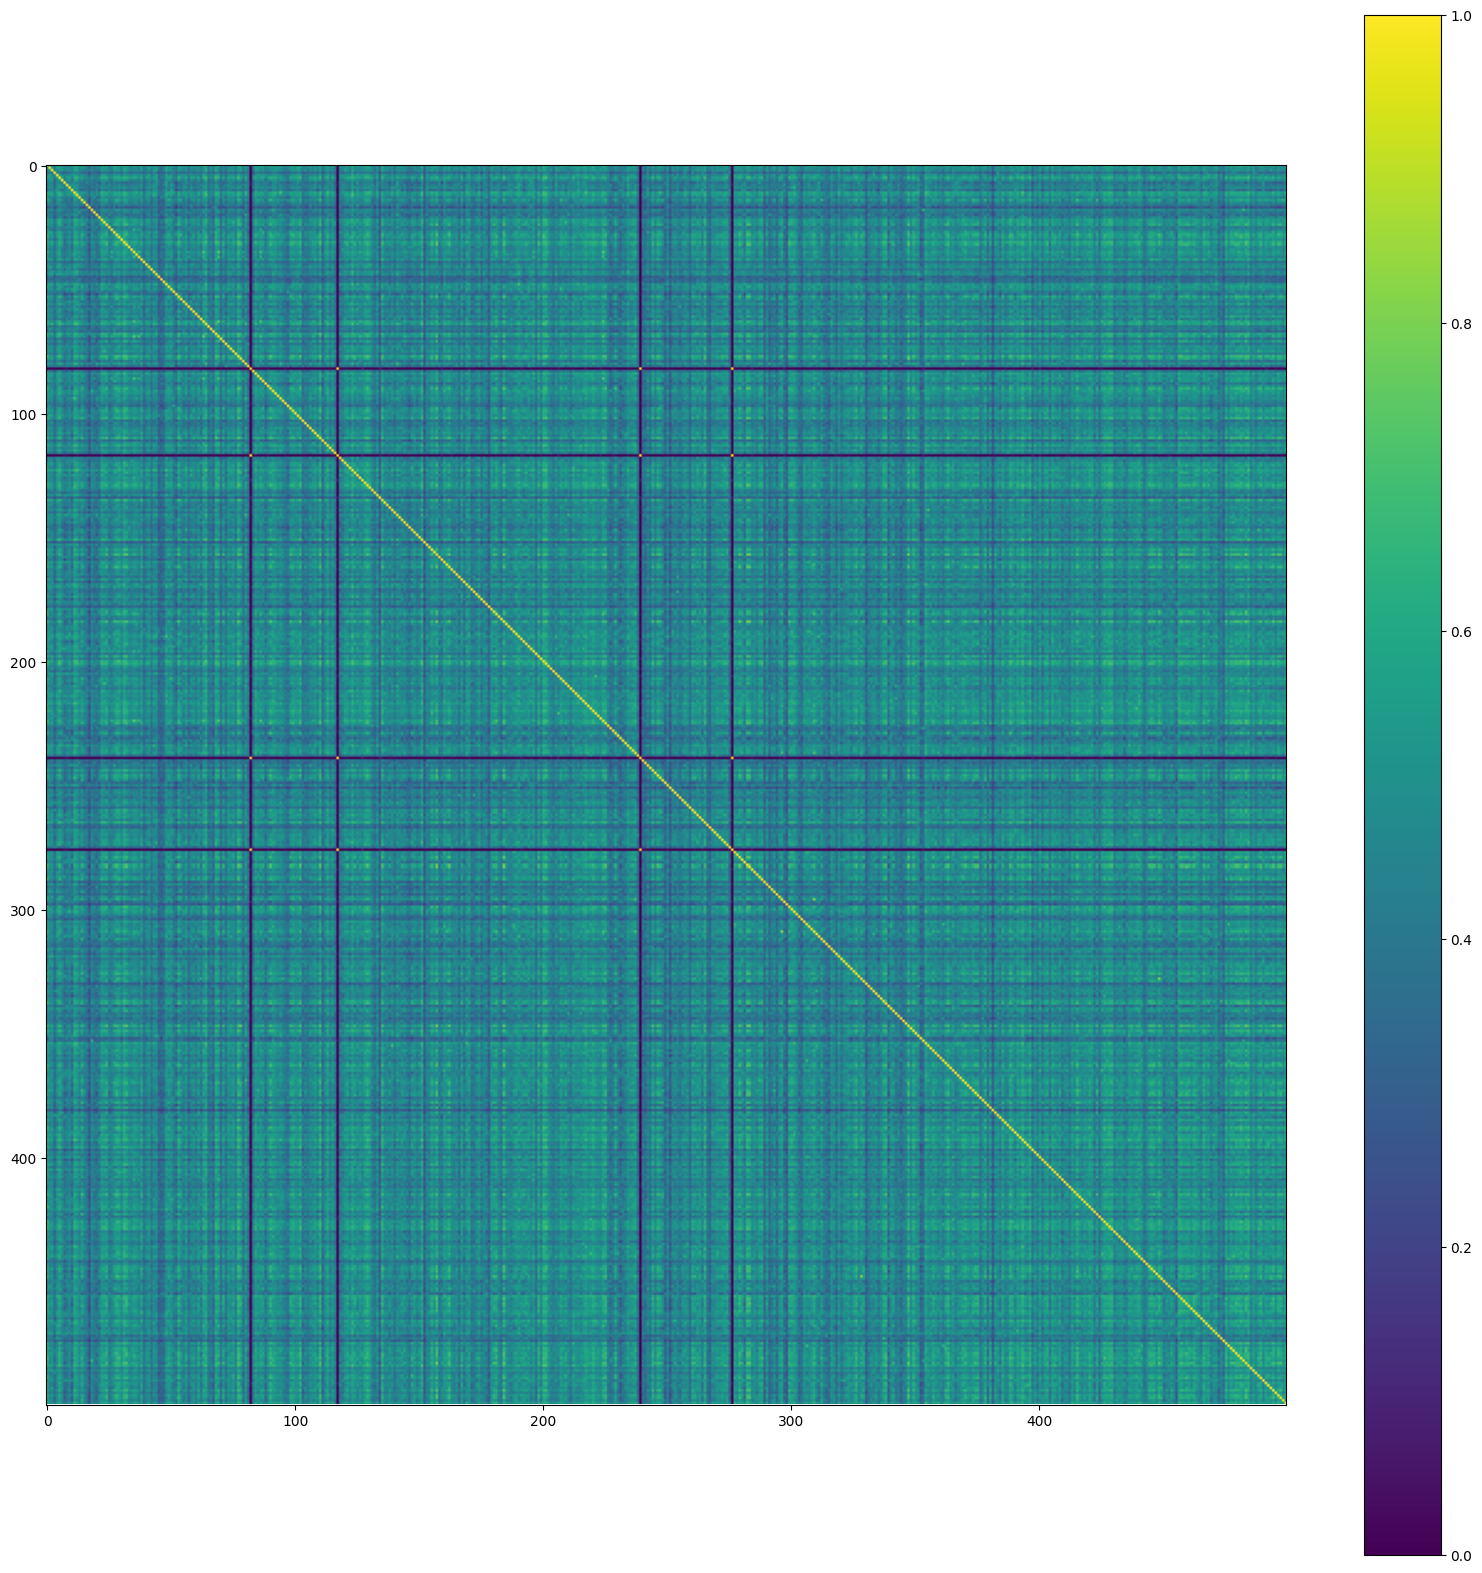

In [ ]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(abstr)

arr = X.toarray()

plt.figure(figsize=(20,20))
plt.imshow(cosine_similarity(arr))
plt.colorbar()

#и как мне эту хуиту анализировать?

In [ ]:
from sklearn.cluster import AffinityPropagation

af = AffinityPropagation(
    affinity='precomputed',  # работает с матрицей схожести напрямую
    damping=0.5,            # параметр "затухания" (обычно 0.5-0.9)
)

clusters = af.fit_predict(cosine_similarity(arr))

In [ ]:
max(af.labels_)

np.int64(33)

In [ ]:
#сгруппируем

groups = [[] for k in range(34)]

abstr_data = [[] for k in range(34)]
for j in range(len(articles_data)):
    label = af.labels_[j]
    pub = (articles_data[j]["title"], articles_data[j]["full_abstract"])
    groups[label].append(pub)
    abstr_data[label].append(articles_data[j]["full_abstract"])

In [ ]:
import json

with open('groups.json', 'w', encoding='utf-8') as f:
    json.dump(groups, f, ensure_ascii=False, indent=2)  # indent для читаемости

In [ ]:
with open('abstracts.json', 'w', encoding='utf-8') as f:
    json.dump(abstr_data, f, ensure_ascii=False, indent=2)  # indent для читаемости

In [ ]:
with open('abstracts2.json', 'w', encoding='utf-8') as f:
    json.dump(abstr_data[2], f, ensure_ascii=False, indent=2)  # indent для читаемости

with open('abstracts3.json', 'w', encoding='utf-8') as f:
    json.dump(abstr_data[3], f, ensure_ascii=False, indent=2)  # indent для читаемости

with open('abstracts4.json', 'w', encoding='utf-8') as f:
    json.dump(abstr_data[4], f, ensure_ascii=False, indent=2)  # indent для читаемости

with open('abstracts12.json', 'w', encoding='utf-8') as f:
    json.dump(abstr_data[12], f, ensure_ascii=False, indent=2)  # indent для читаемости

with open('abstracts14.json', 'w', encoding='utf-8') as f:
    json.dump(abstr_data[14], f, ensure_ascii=False, indent=2)  # indent для читаемости